In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import cv2
import os

In [7]:
train=ImageDataGenerator(rescale=1/255)
validate=ImageDataGenerator(rescale=1/255)

train_dataset=train.flow_from_directory(r'F:\Projects\mlticlass_6_set flower classifier\Base-data\train_data',
                                        target_size=(200,200), batch_size=10, class_mode= 'categorical')

validate_dataset=validate.flow_from_directory(r'F:\Projects\mlticlass_6_set flower classifier\Base-data\validate_data',
                                              target_size=(200,200), batch_size=10, class_mode= 'categorical')


train_dataset.class_indices

Found 555 images belonging to 6 classes.
Found 360 images belonging to 6 classes.


{'dahlia': 0,
 'hibiscus': 1,
 'jasmine': 2,
 'lotus': 3,
 'marigold': 4,
 'pansy': 5}

In [8]:
# creating a model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model=Sequential()
model.add(Conv2D(32,3 , activation='relu', input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(32,3 , activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,3 , activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(6, activation='softmax'))



#complile the model

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])


#fitting the model

model_fit=model.fit(train_dataset, validation_data=validate_dataset, steps_per_epoch=56, epochs=20 )



Train for 56 steps, validate for 36 steps
Epoch 1/20


c:\users\marchmelody\.conda\envs\test\lib\site-packages\PIL\Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


56/56 [==============================] - 36s 652ms/step - loss: 2.8007 - accuracy: 0.3369 - val_loss: 1.2461 - val_accuracy: 0.5889
Epoch 2/20
56/56 [==============================] - 34s 601ms/step - loss: 1.1551 - accuracy: 0.5838 - val_loss: 0.4588 - val_accuracy: 0.8361
Epoch 3/20
56/56 [==============================] - 35s 616ms/step - loss: 0.7420 - accuracy: 0.7694 - val_loss: 0.5716 - val_accuracy: 0.7500
Epoch 4/20
56/56 [==============================] - 34s 606ms/step - loss: 0.3952 - accuracy: 0.8667 - val_loss: 0.1817 - val_accuracy: 0.9694
Epoch 5/20
56/56 [==============================] - 34s 606ms/step - loss: 0.1824 - accuracy: 0.9568 - val_loss: 0.0456 - val_accuracy: 0.9861
Epoch 6/20
56/56 [==============================] - 34s 608ms/step - loss: 0.4493 - accuracy: 0.9477 - val_loss: 0.0124 - val_accuracy: 0.9944
Epoch 7/20
56/56 [==============================] - 34s 603ms/step - loss: 0.2124 - accuracy: 0.9676 - val_loss: 0.0099 - val_accuracy: 0.9972
Epoch 8/20

In [9]:
#saving the model

model.save('flwrset6.h5')
print('model saved into disk')

model saved into disk


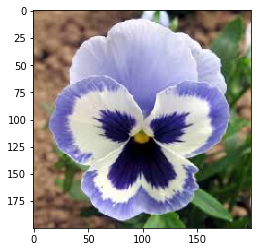

Pansy


In [24]:
# prediction



test_image = image.load_img(r'C:\Users\MarchMelody\Desktop\testing\pns3.jpg', target_size = (200,200))
plt.imshow(test_image)
plt.show()

a = image.img_to_array(test_image)
b = np.expand_dims(a , axis = 0)


# loading the model

# loadmodel=tf.keras.models.load_model('F:\Jupyter Notebook\flwrset6.h5')


result = model.predict(b)

if result[0][0] == 1:
    print ('dahlia')

elif result[0][1] == 1:
    print ('hibiscus')

elif result[0][2] == 1:
    print ('jasmine')
    
elif result[0][3] == 1:
    print ('lotus')
    
elif result[0][4] == 1:
    print ('marigold')
    
elif result[0][5] == 1:
    print ('Pansy')

else:
    print ('unknown flower recognize')

In [25]:
result

array([[0., 0., 0., 0., 0., 1.]], dtype=float32)